# Problem 1:  Reaction extent

## Problem 1A
Ammonia has been proposed as a chemical to store hydrogen for a hydrogen fuel cell due its favorable volumetric hydrogen density. Write down the stoichiometric vector for the thermal decomposition of ammonia to nitrogen and hydrogen.

${2\;NH_3 \rightarrow N_2 + 3\;H_2}$

## Problem 1B
Suppose that we know the initial gas concentration of ammonia in a tank is 100 mol/L, and the fractional reaction extent proceeds as $\Xi=(1-e^{-3t^3})$ where $t$ is the time in seconds.  Plot the concentration of ammonia, nitrogen, and hydrogen as a function of time over the first 2 seconds.  Label the plot with a legend to indicate the species.  

From class, we know that
\begin{equation}
C_J = C_{J,0} + \alpha_J \xi
\end{equation}
So how do we find $\xi$? We use the other equation:
\begin{equation}
\Xi = \xi / \xi_{max}
\end{equation}
and rearrange it to:
\begin{equation}
\xi = \Xi \cdot\xi_{max}
\end{equation}
So how do we find $\xi_{max}$? Use:
\begin{equation}
\xi_{max} = -\frac{C_{J,0}}{\alpha_J}
\end{equation}
Let's put it all together:
\begin{equation}
C_J = C_{J,0} + \alpha_J \Xi \biggl(-\frac{C_{J,0}}{\alpha_J}\biggr)
\end{equation}
We can generalize this to:
\begin{equation}
C_i = C_{i,0} + \alpha_i \Xi \biggl(-\frac{C_{J,0}}{\alpha_J}\biggr)
\end{equation}
where i is any species and J is the limiting reactant

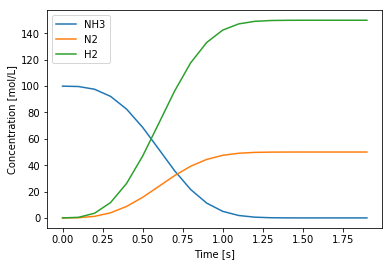

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# The stoichiometric vector for thermal decomposition of ammonia
alpha = np.array([-2, 1, 3])
# The initial concentrations of ammonia, nitrogen, and hydrogen (mol/L)
C0 = [100, 0, 0]

def X(t):
    ''' Function to calculate the extent of reaction given time, t '''
    return (1-np.exp(-3*t**3))

def C(t):
    ''' Function to calculate the vector of species concentrations given time, t '''
    return C0 + X(t)*alpha*(C0[0]/-alpha[0])

Csave = []
Xsave = []
trange = np.arange(0, 2, 0.1)
for t in trange:
    Xsave.append(X(t))
    Csave.append(C(t))

fig, ax1 = plt.subplots()
ax1.plot(trange, Csave)
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Concentration [mol/L]')
ax1.legend(labels=['NH3', 'N2', 'H2'])
plt.show()

## Problem 1C
The operator is worried that if the reaction continues to full extent the increase in the number of moles will drive the pressure too high.  Calculate the time it will take to achieve a 50% higher pressure in the reactor (assuming ideal gas) due to the increase in the number of moles, using fsolve.

In [2]:
from scipy.optimize import fsolve

def Nmol(t):
    '''
    This function calculates the total number of moles in the system as a function of time
    '''
    return np.sum(C(t))

def objective(t):
    '''
    This is our objective function; we want to find when the total number of moles
    in the system reaches 150
    '''
    return Nmol(t) - 150

t50, = fsolve(objective, 0.5)
print('50% increase in pressure at {0:.2f}s'.format(t50))

50% increase in pressure at 0.61s


# Problem 2:  Stoichiometry of reaction systems

## Problem 2A
Suppose we have a reactor with a number of possible reactions:
1. ${H_2O + CO \leftrightarrow H_2 + CO_2 }$

1. ${CO_2 \leftrightarrow C + O_2 }$

1. ${O_2 + 2\; H_2 \leftrightarrow 2\; H_2O}$

1. ${CO + 1/2\; O_2 \leftrightarrow CO_2}$

1. ${C + 2\; H_2 \leftrightarrow CH_4}$

1. ${CH4 + 2\; O_2\leftrightarrow CO_2 + 2\; H_2O}$

For each reaction, write the stoichiometric coefficients in vector form in the form

[${H_2O,\; CO,\; H_2,\; CO_2,\; C,\; O_2,\; CH_4}$]

## Problem 2B
Stack these vectors vertically to form a matrix of reaction coefficients $\mathbf{M}$ for this system (each column corresponds to a reaction)

In [3]:
import numpy as np
M = np.array([[-1,-1, 1, 1, 0,   0,  0],
              [ 0, 0, 0,-1, 1,   1,  0],
              [ 2, 0,-2, 0, 0,  -1,  0],
              [ 0,-1, 0, 1, 0,-1/2,  0],
              [ 0, 0,-2, 0,-1,   0,  1],
              [ 2, 0, 0, 1, 0,  -2, -1]]).transpose()
print(M)

[[-1  0  2  0  0  2]
 [-1  0  0 -1  0  0]
 [ 1  0 -2  0 -2  0]
 [ 1 -1  0  1  0  1]
 [ 0  1  0  0 -1  0]
 [ 0  1 -1 -1  0 -2]
 [ 0  0  0  0  1 -1]]


## Problem 2C
This matrix has a lot of information embedded in it. Suppose we want to turn methane into syngas ($H_2$ and $CO$):
\begin{align}
CH_4 + O_2 \rightarrow H_2 + CO + H_2O
\end{align}
and we can control the extent of each reaction. Is there a set of reaction extents that we can use to effectively yield the reaction above? We can represent this as searching for a linear combination of the known reactions that will form this new reaction:
\begin{align}
\text{Desired reaction}=\begin{pmatrix}1\\ 1\\ 1\\0\\0\\-1\\-1\end{pmatrix} = \mathbf{M}\Xi
\end{align}

Where $\Xi$ is a vector of reaction extents. Find the reaction extents that lead to a solution to this equation using [`numpy.linalg.lstsq`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html).

In [4]:
from numpy.linalg import lstsq

# `b` is the vector for the effective reaction that we are trying to create
b = np.array([1, 1, 1, 0, 0, -1, -1])
# `x` is the linear combination of the original reactions we need to create `b`
x, residuals, rank, s = lstsq(M, b)
print('Vector of reaction extents:\n%s' % x)

Vector of reaction extents:
[ -1.00000000e+00  -5.00000000e-01  -5.00000000e-01   2.33146835e-15
  -5.00000000e-01   5.00000000e-01]


## Problem 2D
Check that the numerical solution yields the desired final reaction using np.matmul

In [5]:
print(np.matmul(M, x))

[  1.00000000e+00   1.00000000e+00   1.00000000e+00  -1.77635684e-15
  -3.33066907e-16  -1.00000000e+00  -1.00000000e+00]


## Problem 2E
The same final reaction could be arrived at with R1 + R6 - 2R4.  How many different ways do you think you could arrive at the same reaction? Why are there multiple combinations?

Answer involving the number of reactions, plus the three conservation relations (for each species C/H/O) being greater than the number of species, and explaining that there's an infinite space of combinations that would do this reaction

## Problem 2F
Finally, imagine that only three of the six reactions are kinetically feasible:
1. $H_2O + CO \leftrightarrow H_2 + CO_2$

1. $O_2 + 2\; H_2 \leftrightarrow 2\; H_2O$

1. $CH_4 + 2\;O_2 \leftrightarrow CO_2 + 2\; H_2O$

Repeat the analysis with this subset of reactions to identify a new vector of reaction extents that would be necessary to yield the reaction in Part 2C.

In [6]:
import numpy as np
M = np.array([[-1, -1,  1, 1, 0,  0,  0],
              [2,   0, -2, 0, 0, -1,  0],
              [2,   0,  0, 1, 0, -2, -1]]).transpose()
b = np.array([1,1,1,0,0,-1,-1])
x, residuals, rank, s = lstsq(M, b)
print(x)

[-1. -1.  1.]
